In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from functools import reduce
import random

In [2]:
snsC = {
    'font.size': 10.0,
    'axes.labelsize': 'medium',
    'axes.titlesize': 'large',
    'xtick.labelsize': 'medium',
    'ytick.labelsize': 'medium',
    'legend.fontsize': 'medium',
    'axes.linewidth': 0.8,
    'grid.linewidth': 0.8,
    'lines.linewidth': 1.5,
    'lines.markersize': 6.0,
    'patch.linewidth': 1.0,
    'xtick.major.width': 0.8,
    'ytick.major.width': 0.8,
    'xtick.minor.width': 0.6,
    'ytick.minor.width': 0.6,
    'xtick.major.size': 3.5,
    'ytick.major.size': 3.5,
    'xtick.minor.size': 2.0,
    'ytick.minor.size': 2.0,
    'legend.title_fontsize': None
}

In [4]:
train_df = pd.read_csv('../data/SemiFinal/train_dataV2.csv')
# val_df = pd.read_csv('../data/SemiFinal/validation_dataV2.csv')

train_df.head()

,CategoryCode,ItemCode,DateID,DailySales,DOW,WOY,DOY
0,category_2,1071115,2021-12-19,1,6,50,353
1,category_4,210652,2022-02-13,1,6,6,44
2,category_2,877624,2021-12-19,1,6,50,353
3,category_1,371104,2021-12-19,3,6,50,353
4,category_1,1090294,2021-12-19,3,6,50,353


In [5]:
I2C_map = pd.Series(train_df.CategoryCode.values,index=train_df.ItemCode).to_dict()

In [8]:
saleD = pd.read_csv('../data/SemiFinal/DSalesPointsV2.csv')
saleD.head()

,ItemCode,#sales,stage,DailySales
0,3418,140,validation,"[18, 3, 8, 2, 4, 2, 8, 12, 0, 14, 2, 9, 8, 5, 15, 2, 0, 14, 4, 12, 2, 1, 6, 2, 13, 5, 5, 6, 10, 2, 3, 8, 12, 8, 10, 7, 1, 0, 14, 3, 6, 7, 3, 5, 5, 7, 20, 10, 0, 12, 0, 0, 2, 10, 6, 17, 7, 5, 7, 6, 6, 13, 14, 9, 12, 9, 25, 11, 6, 16, 12, 20, 11, 12, 15, 4, 24, 3, 13, 2, 7, 19, 1, 16, 19, 9, 4, 6, 6, 10, 11, 6, 4, 13, 9, 26, 2, 20, 20, 3, 3, 7, 7, 14, 28, 8, 9, 12, 18, 0, 16, 12, 18, 8, 17, 15, 2, 3, 19, 7, 9, 12, 22, 7, 17, 29, 10, 11, 13, 6, 7, 26, 9, 2, 19, 3, 8, 7, 4, 2]"
1,3427,138,test,"[2, 7, 2, 3, 9, 0, 5, 8, 10, 5, 5, 4, 0, 4, 3, 2, 2, 27, 1, 7, 0, 6, 6, 1, 21, 5, 11, 2, 10, 2, 3, 3, 3, 5, 14, 2, 0, 1, 10, 5, 0, 2, 7, 4, 8, 5, 6, 20, 1, 11, 6, 3, 1, 7, 5, 2, 11, 9, 7, 5, 5, 20, 6, 4, 7, 10, 15, 4, 5, 3, 7, 2, 10, 8, 5, 3, 6, 5, 13, 5, 20, 13, 6, 16, 12, 2, 9, 15, 3, 5, 7, 2, 2, 5, 5, 1, 5, 5, 44, 3, 3, 4, 13, 0, 9, 2, 3, 1, 9, 9, 9, 1, 2, 2, 2, 7, 3, 1, 5, 1, 8, 4, 7, 6, 6, 15, 8, 8, 8, 7, 2, 2, 9, 10, 4, 1, 0, 3]"
2,7666,140,test,"[14, 58, 12, 8, 5, 33, 11, 23, 24, 15, 41, 20, 5, 12, 15, 68, 35, 55, 2, 28, 17, 37, 27, 19, 10, 31, 29, 21, 1, 0, 2, 0, 5, 0, 6, 0, 0, 4, 5, 3, 0, 0, 0, 0, 2, 3, 2, 0, 0, 8, 15, 2, 6, 14, 0, 3, 22, 31, 3, 3, 11, 11, 13, 9, 32, 3, 15, 40, 9, 12, 12, 17, 36, 33, 22, 21, 79, 25, 20, 19, 10, 43, 12, 3, 25, 17, 15, 28, 10, 16, 2, 26, 13, 12, 1, 6, 0, 6, 0, 2, 0, 0, 3, 7, 2, 8, 2, 4, 2, 4, 5, 3, 7, 0, 7, 5, 0, 7, 3, 14, 6, 3, 2, 0, 36, 0, 1, 0, 2, 1, 4, 28, 5, 0, 1, 0, 2, 0, 4, 29]"
3,9925,138,test,"[1, 3, 1, 2, 0, 0, 2, 1, 0, 1, 8, 0, 2, 0, 0, 5, 1, 3, 1, 2, 1, 0, 0, 1, 1, 0, 0, 3, 0, 9, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 1, 2, 0, 1, 1, 0, 4, 0, 4, 3, 3, 3, 2, 2, 1, 1, 0, 2, 4, 1, 3, 0, 0, 0, 1, 0, 3, 11, 0, 5, 1, 1, 1, 3, 2, 0, 3, 5, 0, 6, 3, 2, 2, 3, 1, 2, 6, 4, 2, 2, 2, 1, 2, 0, 1, 0, 1, 2, 2, 0, 4, 1, 1, 0, 1, 2, 4, 2, 1, 4, 0, 2, 1, 2, 0, 2, 5, 0, 1, 0, 0, 1, 1, 2, 2, 2, 0, 1, 13, 1, 4, 1, 1, 0, 1, 5, 0, 2]"
4,16936,140,validation,"[4, 1, 4, 1, 0, 0, 21, 2, 1, 0, 5, 9, 2, 8, 8, 8, 0, 8, 1, 2, 4, 6, 0, 10, 1, 10, 6, 0, 4, 0, 0, 2, 10, 2, 9, 2, 10, 8, 0, 1, 2, 0, 0, 2, 2, 4, 0, 4, 3, 13, 2, 8, 4, 0, 1, 140, 2, 4, 0, 4, 3, 3, 20, 2, 0, 0, 1, 13, 4, 0, 7, 3, 0, 3, 0, 4, 8, 5, 5, 0, 0, 4, 10, 4, 9, 2, 20, 4, 8, 2, 5, 8, 7, 6, 7, 2, 5, 3, 19, 24, 14, 11, 5, 10, 2, 23, 15, 0, 4, 2, 9, 10, 15, 0, 3, 5, 18, 11, 12, 0, 10, 10, 4, 3, 17, 16, 2, 0, 6, 6, 2, 8, 9, 17, 9, 20, 4, 13, 4, 2]"


In [10]:
saleW = pd.read_csv('../data/SemiFinal/WSalesPointsV2.csv')
saleW.head()

,Unnamed: 0,ItemCode,#sales,stage,WeeklySales
0,0,3418,21,validation,"[83, 85, 89, 67, 109, 72, 21, 29, 42, 41, 41, 44, 46, 43, 49, 54, 69, 101, 73, 75, 56]"
1,1,3427,21,test,"[66, 32, 34, 29, 58, 35, 3, 11, 40, 20, 48, 54, 28, 36, 52, 42, 57, 46, 45, 78, 39]"
2,2,7666,21,test,"[15, 26, 28, 38, 41, 39, 35, 84, 119, 196, 185, 94, 15, 10, 30, 79, 82, 141, 219, 125, 107]"
3,3,9925,21,test,"[8, 9, 14, 10, 8, 21, 8, 1, 9, 11, 13, 5, 11, 11, 13, 12, 10, 21, 15, 17, 19]"
4,4,16936,21,validation,"[74, 66, 43, 66, 48, 71, 23, 9, 25, 40, 31, 21, 43, 7, 34, 151, 32, 28, 25, 49, 40]"


In [11]:
n = 15
random.seed(435)
C2I = train_df.groupby('CategoryCode').agg(list).to_dict()['ItemCode']
rnd_items = reduce(lambda x,y: x+random.choices(y, k=n), C2I.values(), [] )
strf_df = train_df.loc[train_df['ItemCode'].isin(rnd_items), :]
strf_df['DateID'] = pd.to_datetime(strf_df['DateID'])
strf_df

C:\Users\deela\AppData\Local\Temp/ipykernel_6032/1991771274.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strf_df['DateID'] = pd.to_datetime(strf_df['DateID'])


,CategoryCode,ItemCode,DateID,DailySales,DOW,WOY,DOY
5,category_1,145330,2021-12-19,3,6,50,353
10,category_3,1101661,2021-12-19,7,6,50,353
12,category_3,1060630,2022-02-13,2,6,6,44
13,category_2,130993,2022-02-13,13,6,6,44
16,category_2,87046,2021-12-19,1,6,50,353
...,...,...,...,...,...,...,...
20634,category_1,839374,2021-10-12,5,1,41,285
20642,category_2,1070836,2021-10-12,7,1,41,285
20646,category_1,36898,2021-10-12,1,1,41,285
20649,category_3,1064572,2021-10-12,1,1,41,285


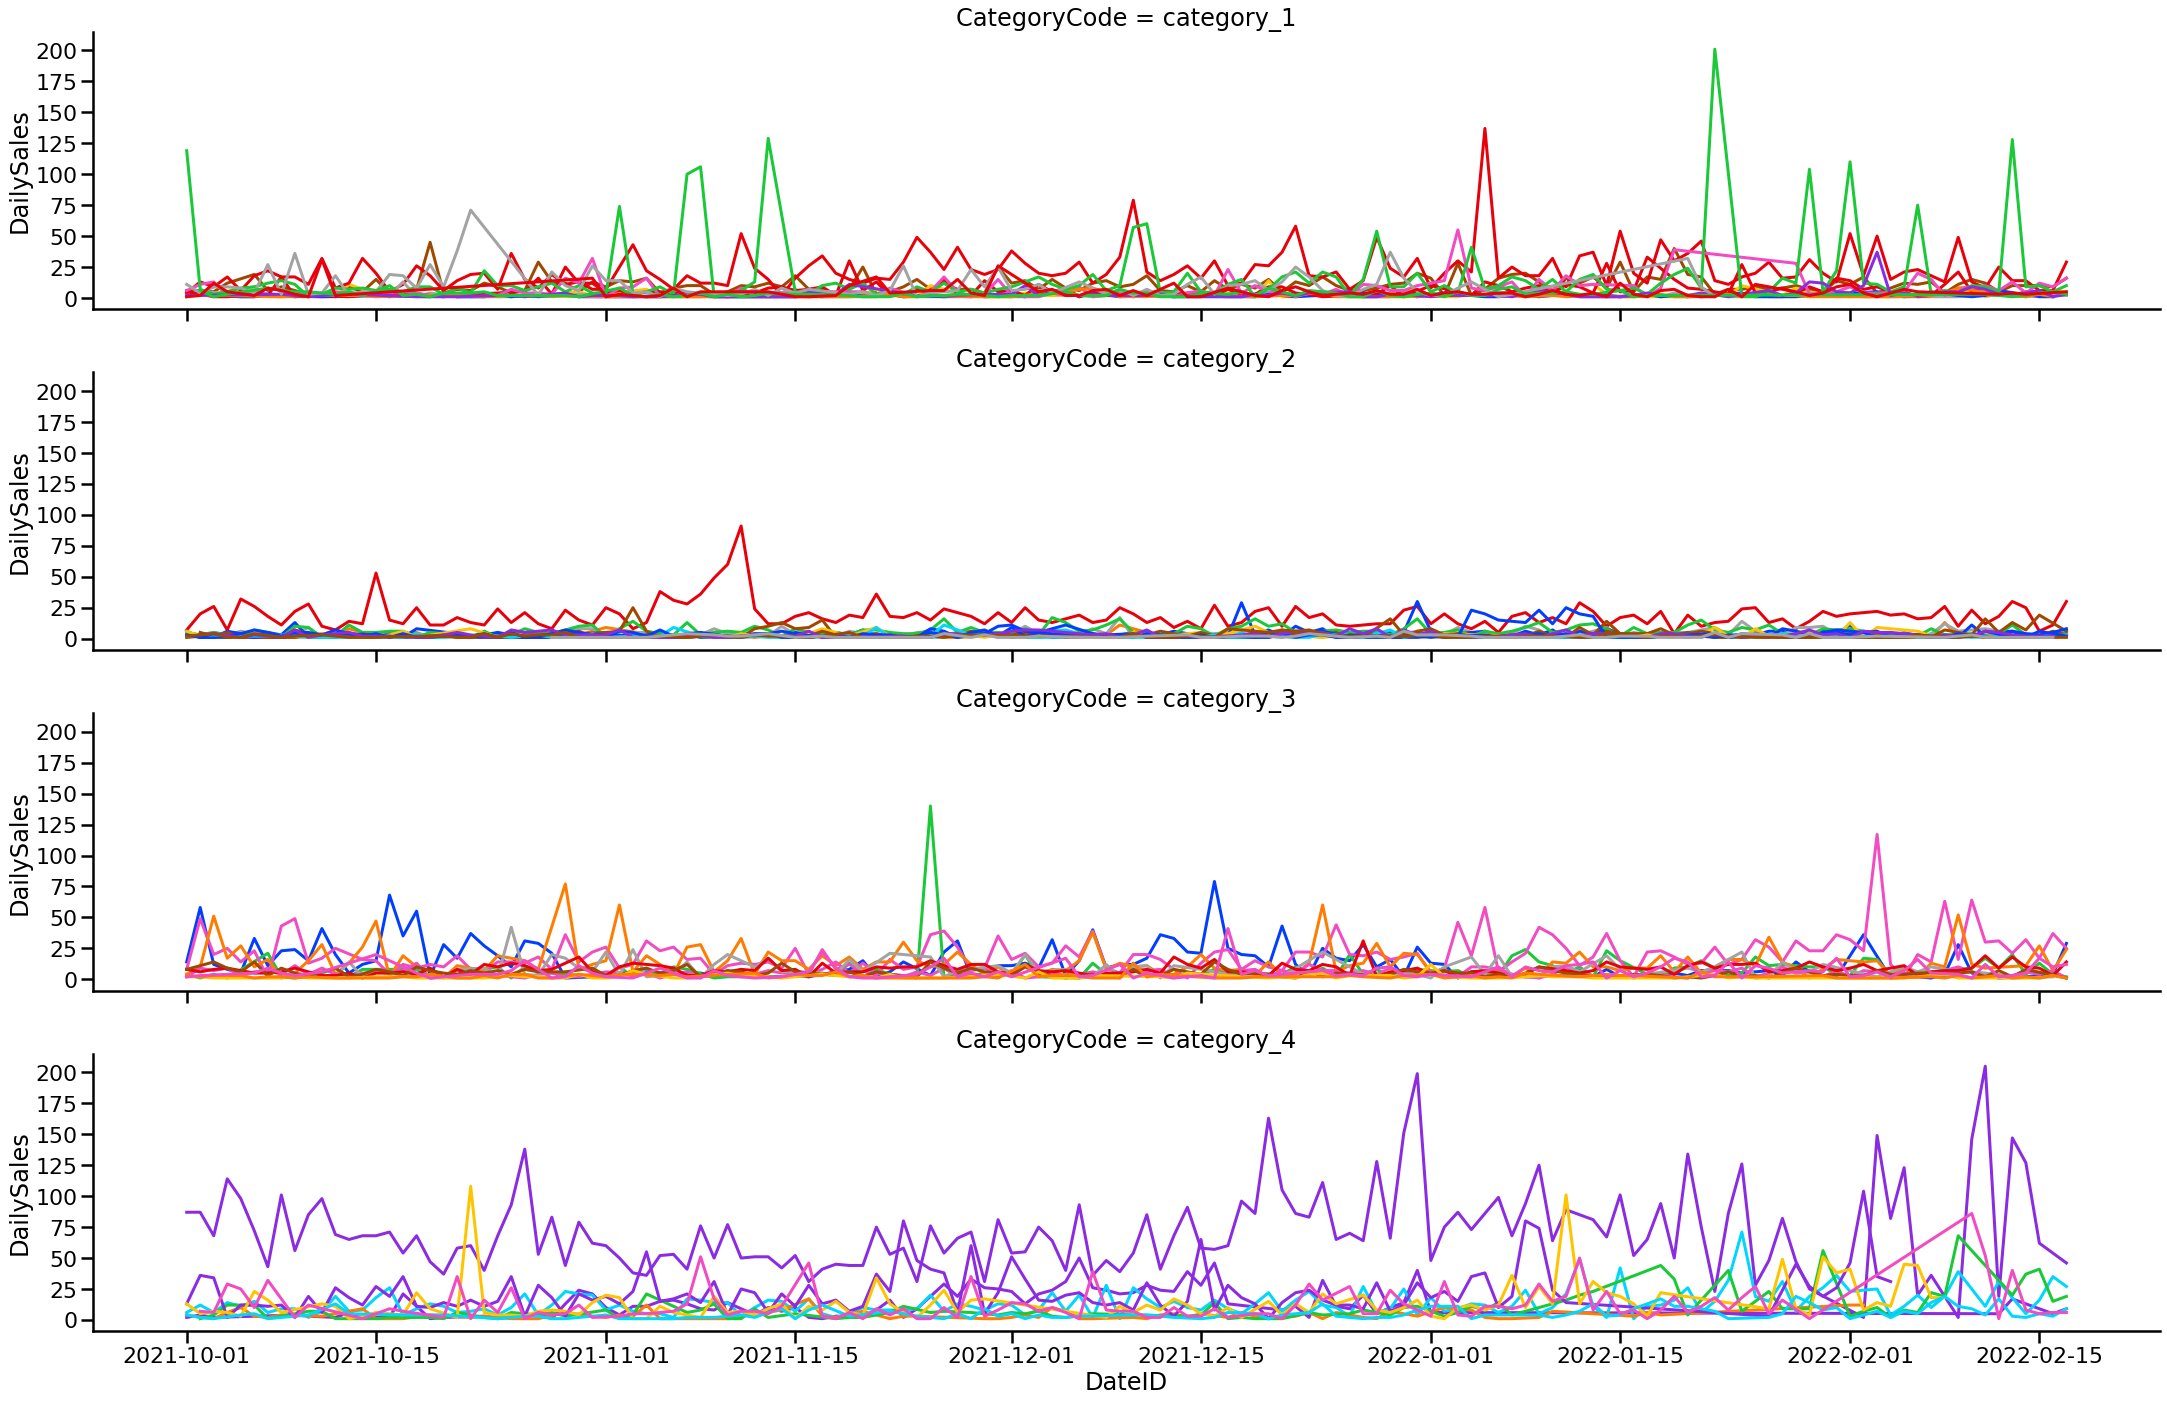

In [12]:

with sns.plotting_context("poster"):
    g = sns.relplot(x='DateID', y='DailySales', hue='ItemCode', row='CategoryCode', kind='line', data=strf_df, palette="bright", legend=False, row_order=['category_1', 'category_2', 'category_3', 'category_4'])
    g.fig.set_size_inches(60,20)
    # g.fig.suptitle("Daily sales over train period under 4 categories",fontsize=20)
# plt.setp(, fontsize='22') # for legend text
# g.set_xlabel("Category Code",fontsize=30)
# g.set_ylabel("Daily Sales",fontsize=20)

***

In [10]:
train_udf = pd.read_csv('../data/train_dataV3.csv')
train_udf.head()

,Unnamed: 0,ItemCode,Date,DailySales,CategoryCode
0,0,3418,2021-10-01,18,category_1
1,1,3418,2021-10-02,3,category_1
2,2,3418,2021-10-03,8,category_1
3,3,3418,2021-10-04,2,category_1
4,4,3418,2021-10-05,4,category_1


In [12]:
# train_df.copy().sort_values(by='DateID').groupby('WOY')['DateID'].first().dt.date.astype(str).to_dict()

In [30]:
itemC = 7666
train_df['DateID'] = pd.to_datetime(train_df['DateID'])
W2D_list = train_df.copy().sort_values(by='DateID').groupby('WOY')['DateID'].first().dt.date.astype(str).values
# Date_list = train_df.loc[train_df['ItemCode']==itemC, 'DateID'].astype(str).values
Date_list = pd.date_range('2021-10-01', '2022-02-17', freq='D').astype(str).values


dSales = eval(saleD.loc[saleD['ItemCode']==itemC, 'DailySales'].values[0])
wSales = eval(saleW.loc[saleD['ItemCode']==itemC, 'WeeklySales'].values[0])
# .to_dict()

In [31]:
saleD.loc[saleD['ItemCode']==3418, 'DailySales'].values[0]

'[18, 3, 8, 2, 4, 2, 8, 12, 0, 14, 2, 9, 8, 5, 15, 2, 0, 14, 4, 12, 2, 1, 6, 2, 13, 5, 5, 6, 10, 2, 3, 8, 12, 8, 10, 7, 1, 0, 14, 3, 6, 7, 3, 5, 5, 7, 20, 10, 0, 12, 0, 0, 2, 10, 6, 17, 7, 5, 7, 6, 6, 13, 14, 9, 12, 9, 25, 11, 6, 16, 12, 20, 11, 12, 15, 4, 24, 3, 13, 2, 7, 19, 1, 16, 19, 9, 4, 6, 6, 10, 11, 6, 4, 13, 9, 26, 2, 20, 20, 3, 3, 7, 7, 14, 28, 8, 9, 12, 18, 0, 16, 12, 18, 8, 17, 15, 2, 3, 19, 7, 9, 12, 22, 7, 17, 29, 10, 11, 13, 6, 7, 26, 9, 2, 19, 3, 8, 7, 4, 2]'

In [32]:
print(len(Date_list), len(dSales))

140 140


In [33]:
print(len(wSales), len(W2D_list))

21 21


Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


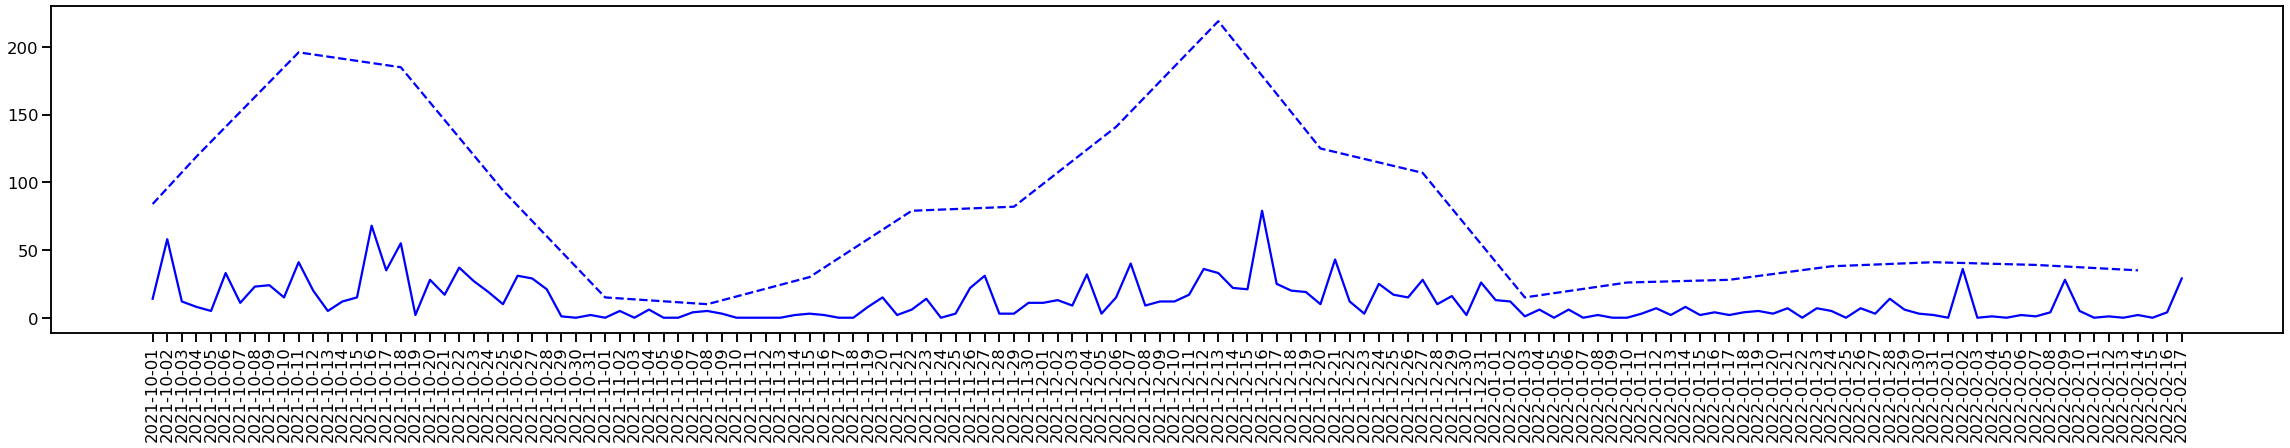

In [34]:
Cpalette={'Blue': '#0055BF', 'Red': '#C91A09', 'Yellow': '#F2CD37'}
plt.figure(figsize=(40, 6))
with sns.plotting_context("talk"):
    sns.lineplot(x=Date_list, y=dSales, dashes=False, color='blue', markers='o')
    g = sns.lineplot(x=W2D_list, y=wSales, linestyle="dashed", color='blue', markers='o')
    plt.setp(g.get_xticklabels(), rotation=90)

***

In [23]:
train_df.head()

,CategoryCode,ItemCode,DateID,DailySales,DOW,WOY,DOY
0,category_2,117610,2021-11-06,7,5,44,310
1,category_4,836584,2021-11-18,16,3,46,322
2,category_1,370195,2022-01-24,6,0,4,24
3,category_2,172582,2021-10-30,5,5,43,303
4,category_2,1006009,2021-10-30,5,5,43,303


In [24]:
train_df['M'] = train_df['DateID'].dt.month
train_df.head()

,CategoryCode,ItemCode,DateID,DailySales,DOW,WOY,DOY,M
0,category_2,117610,2021-11-06,7,5,44,310,11
1,category_4,836584,2021-11-18,16,3,46,322,11
2,category_1,370195,2022-01-24,6,0,4,24,1
3,category_2,172582,2021-10-30,5,5,43,303,10
4,category_2,1006009,2021-10-30,5,5,43,303,10


In [25]:
cum_df = train_df.copy().loc[: ,['CategoryCode', 'M', 'DailySales']].groupby(['CategoryCode', 'M'])['DailySales'].sum().reset_index()
cum_df.head()

,CategoryCode,M,DailySales
0,category_1,1,12839
1,category_1,2,5243
2,category_1,10,9337
3,category_1,11,10016
4,category_1,12,12093


In [26]:
cum_df.shape

(20, 3)

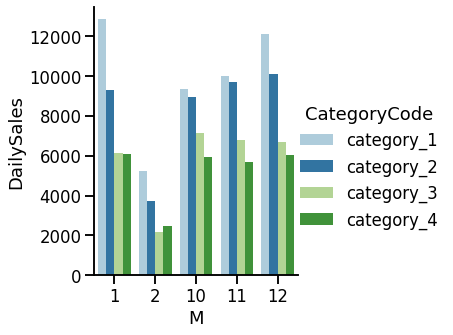

In [27]:
with sns.plotting_context("talk"):
    sns.catplot(x="M", y="DailySales", hue="CategoryCode", data=cum_df, kind="bar", palette="Paired")
# sns.histplot(data=cum_df, x="DailySales", hue="CategoryCode", multiple="stack")

***

In [28]:
pd.set_option('display.max_rows', None)

In [29]:
train_udf.head()

,Unnamed: 0,ItemCode,Date,DailySales,CategoryCode
0,0,3418,2021-10-01,18,category_1
1,1,3418,2021-10-02,3,category_1
2,2,3418,2021-10-03,8,category_1
3,3,3418,2021-10-04,2,category_1
4,4,3418,2021-10-05,4,category_1


In [30]:
# Import Data
Date_list = train_udf.loc[train_udf['ItemCode']==itemC, 'Date'].values
adf = pd.DataFrame({'sales': dSales, 'date': Date_list})
adf['date'] = pd.to_datetime(adf['date'])
adf.set_index('date', inplace=True)
adf.head()

,sales
date,
2021-10-01,14
2021-10-02,58
2021-10-03,12
2021-10-04,8
2021-10-05,5


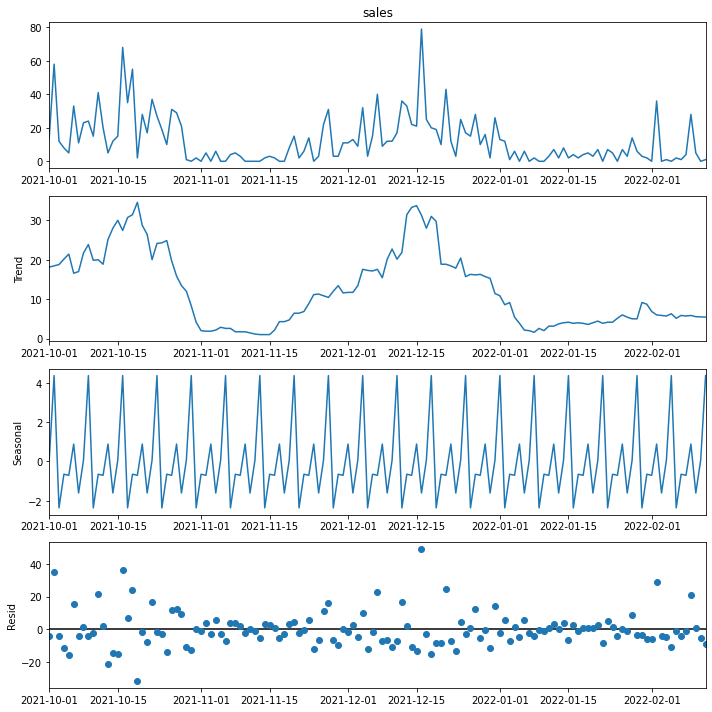

In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
from statsmodels.tsa.seasonal import STL

# pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')
# print(df)

# Multiplicative Decomposition 
# result_mul = seasonal_decompose(df['sales'], model='multiplicative', extrapolate_trend='freq')

# Additive Decomposition
result_add = seasonal_decompose(adf['sales'], model='additive', extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
# result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('', fontsize=22)
plt.show()

In [35]:
! pip install statsmodels

  Using cached patsy-0.5.2-py2.py3-none-any.whl (233 kB)


In [37]:
# wdf = pd.read_csv('../data/sample_train1.csv')
# wdf.head()

FileNotFoundError: [Errno 2] No such file or directory: '../data/sample_train1.csv'

In [ ]:
woy_map = {i: n for i,n in enumerate(range(39, 53), 1)}
woy_map.update({i: n for i,n in enumerate(range(1, 7), 15)})
woy_map

{1: 39,
 2: 40,
 3: 41,
 4: 42,
 5: 43,
 6: 44,
 7: 45,
 8: 46,
 9: 47,
 10: 48,
 11: 49,
 12: 50,
 13: 51,
 14: 52,
 15: 1,
 16: 2,
 17: 3,
 18: 4,
 19: 5,
 20: 6}

In [ ]:
# wdf['WoY'] = wdf['WoY'].map(woy_map)
# wdf.head()

NameError: name 'wdf' is not defined

In [ ]:
# W2M_map = train_df.copy().sort_values(by='DateID').groupby('WOY')['DateID'].first().dt.date.astype(str).to_dict()

# wdf['M'] = wdf['WoY'].map(W2M_map)
# wdf.head()

,Unnamed: 0,CategoryCode,ItemCode,WoY,WeeklySales,M
0,0,category_1,3418,1,83,2022-01-03
1,1,category_1,3418,2,85,2022-01-10
2,2,category_1,3418,3,89,2022-01-17
3,3,category_1,3418,4,67,2022-01-24
4,4,category_1,3418,5,109,2022-01-31


In [ ]:
# # Import Data
# Date_list = wdf.loc[wdf['ItemCode']==itemC, 'M'].values
# wSales = wdf.loc[wdf['ItemCode']==itemC, 'WeeklySales'].values
# bdf = pd.DataFrame({'sales': wSales, 'date': Date_list}).sort_values(by='date')
# bdf['date'] = pd.to_datetime(bdf['date'])
# bdf.set_index('date', inplace=True)
# bdf.head()

,sales
date,
2021-10-01,84
2021-10-04,119
2021-10-11,196
2021-10-18,185
2021-10-25,94


In [ ]:
# bdf['sales'].index

DatetimeIndex(['2021-10-01', '2021-10-04', '2021-10-11', '2021-10-18',
               '2021-10-25', '2021-11-01', '2021-11-08', '2021-11-15',
               '2021-11-22', '2021-11-29', '2021-12-06', '2021-12-13',
               '2021-12-20', '2021-12-27', '2022-01-03', '2022-01-10',
               '2022-01-17', '2022-01-24', '2022-01-31', '2022-02-07'],
              dtype='datetime64[ns]', name='date', freq=None)

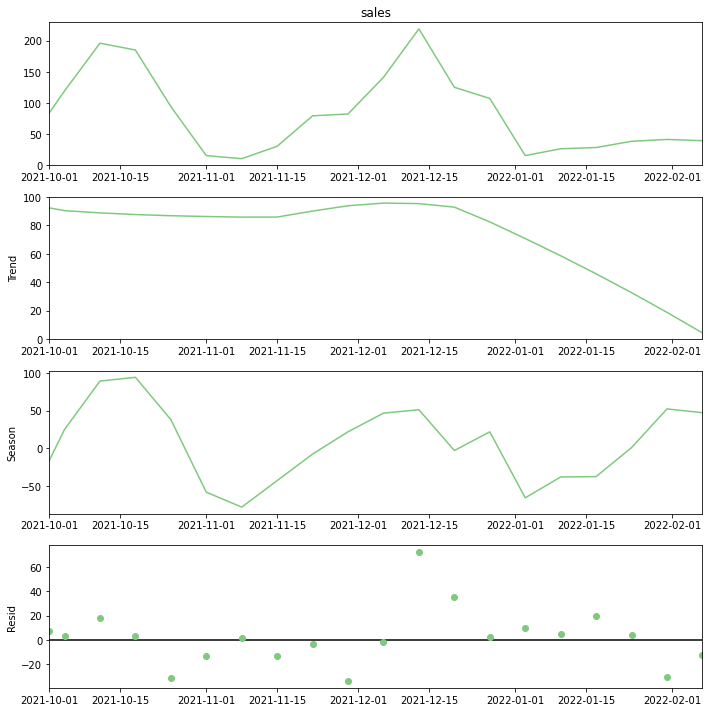

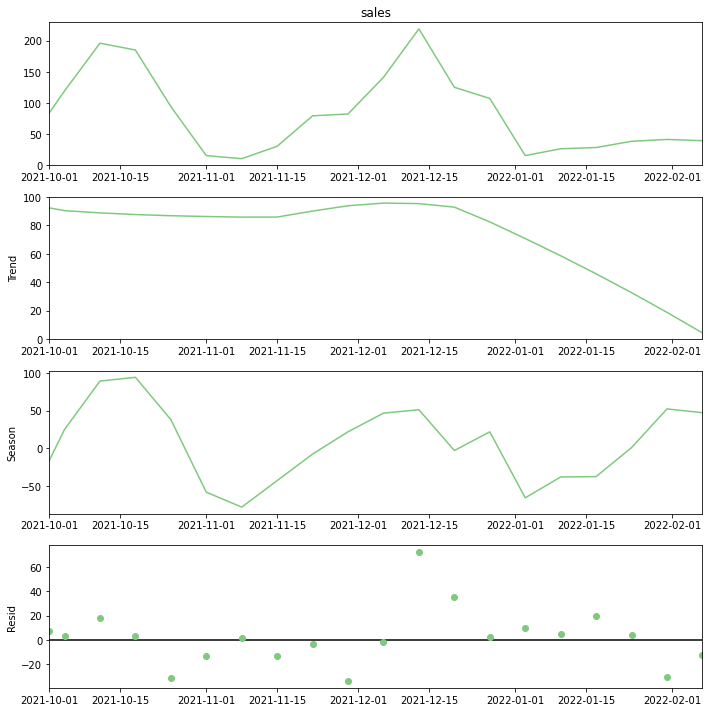

In [ ]:
# res = STL(bdf['sales'], period=7).fit()
# res.plot()

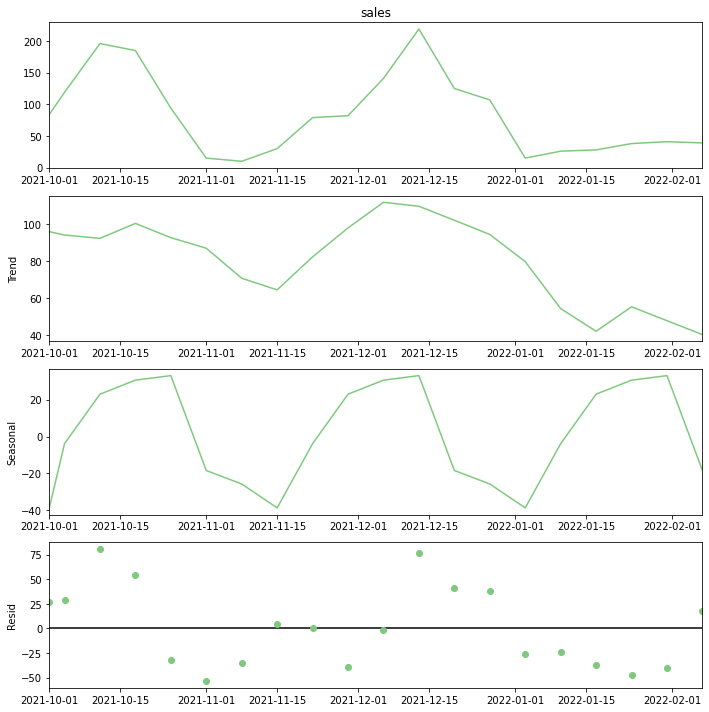

In [ ]:
# # Additive Decomposition
# result_add = seasonal_decompose(bdf['sales'], model='additive', extrapolate_trend='freq', period=7)

# # Plot
# plt.rcParams.update({'figure.figsize': (10,10)})
# # result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
# result_add.plot().suptitle('', fontsize=22)
# plt.show()